In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
sns.set_context('poster')
sns.set_palette('colorblind')
sns.set_style('darkgrid')

In [2]:
ati = pd.read_csv('../data/atium.csv', index_col=0)
ati.drop(ati[ati.KIC == 6603624].index, inplace=True) # faulty
ati.drop(ati[ati.KIC == 8760414].index, inplace=True) # faulty & out of range feh
ati.drop(ati[ati.KIC == 8938364].index, inplace=True) # faulty
ati.drop(ati[ati.eye_flag > 2].index, inplace=True) #unconverged
len(ati)

91

In [13]:
d02real = ati.fit_d02 * ati.dnu
d02real.min()

2.640611748615844

In [61]:
d12real = ati.fit_d01 * ati.dnu - d02real
d12real.min()

17.25027238240546

In [62]:
mhztoperiod(d12real.min()/3)

2.012850664180666

Text(0, 0.5, 'actual rotation')

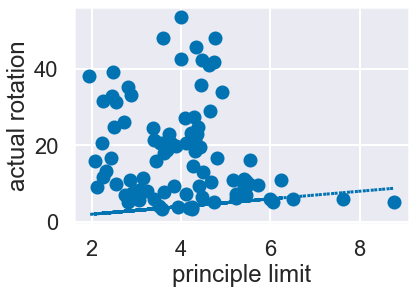

In [64]:
plt.scatter(mhztoperiod(d02real/2), ati.P)
plt.plot(mhztoperiod(d02real/2), mhztoperiod(d02real/2), ls=':')
plt.xlabel('principle limit')
plt.ylabel('actual rotation')

In [65]:
problems = ati[ati.P < mhztoperiod(d02real/2)]
len(problems)

9

In [69]:
list(ati)

['KIC',
 'Teff',
 'age',
 'dnu',
 'eTeff',
 'ednu',
 'efeh',
 'enumax',
 'feh',
 'loage',
 'lomodlogg',
 'lomodmass',
 'lomodrad',
 'modlogg',
 'modmass',
 'modrad',
 'numax',
 'source',
 'upage',
 'upmodlogg',
 'upmodmass',
 'upmodrad',
 'G',
 'bprp',
 'hrclass',
 'neff_xsplit',
 'neff_cosi',
 'neff_split',
 'neff_i',
 'l_nus*',
 'nus*',
 'u_nus*',
 'l_cosi',
 'cosi',
 'u_cosi',
 'l_nus',
 'nus',
 'u_nus',
 'l_i',
 'i',
 'u_i',
 'fit_numax',
 'efit_numax',
 'fit_d01',
 'efit_d01',
 'fit_d02',
 'efit_d02',
 'fit_epsilon',
 'efit_epsilon',
 'V1',
 'eV1',
 'V2',
 'eV2',
 'l_P',
 'P',
 'u_P',
 'l_vsini',
 'vsini',
 'u_vsini',
 'rhat_flag',
 'eye_flag',
 'ebprp']

In [57]:
def mhztoperiod(mhz):
    return (1e6/mhz)/60/60/24

In [60]:
mhztoperiod(d02real.max()/2)

1.945196037760119

In [43]:
ati.loc[np.argmin(d02real), ['P', 'fit_d02', 'dnu']]

P             5.0651
fit_d02    0.0512213
dnu           51.553
Name: 14, dtype: object

In [78]:
import astropy.units as u
year = u.Quantity(0.49, u.year)
sec = year.to(u.second)
fs = (1/sec).to(u.microhertz)
lim = 2*fs
lim

<Quantity 0.12933913 uHz>

In [79]:
(1/lim).to(u.day)

<Quantity 89.48625 d>

## Periodic

In [3]:
aperiodic = pd.read_csv('../data/mcquillan/aperiodic.txt').dropna()
periodic = pd.read_csv('../data/mcquillan/periodic.txt').dropna()

In [4]:
from scipy.stats import gaussian_kde

xy = np.vstack([periodic.Teff, periodic.Prot])
z = gaussian_kde(xy)(xy)
xy = np.vstack([aperiodic.Teff, aperiodic.Prot])
az = gaussian_kde(xy)(xy)

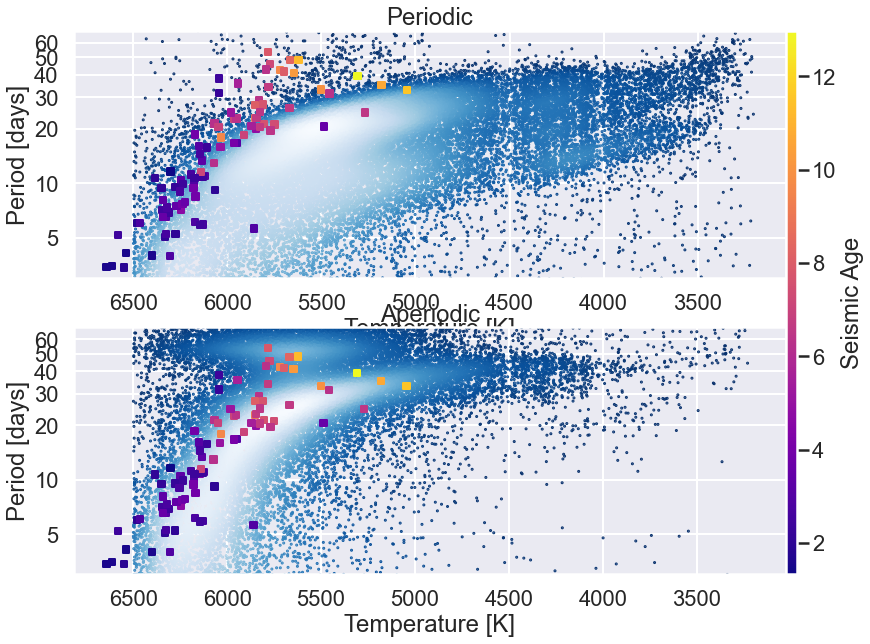

In [5]:
fig, axes = plt.subplots(2,1, figsize=(15, 10))

for ax in axes:
    ax.set_ylabel('Period [days]')
    ax.set_xlabel('Temperature [K]')
    ax.set_yscale('log')
    ax.invert_xaxis()
    ax.set_ylim(3, periodic.Prot.max())
    ax.set_yticks([5, 10, 20, 30, 40, 50, 60])
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    
ax = axes[0]
ax.set_title('Periodic')

ax.scatter(periodic.Teff, periodic.Prot, c=z, s=1, cmap='Blues_r')
c = ax.scatter(ati.Teff, ati.P, c=ati.age, cmap='plasma', marker=',', s=40)

ax = axes[1]
ax.set_title('Aperiodic')

ax.scatter(aperiodic.Teff, aperiodic.Prot, c=az, s=1, cmap='Blues_r')
c = ax.scatter(ati.Teff, ati.P, c=ati.age, cmap='plasma', marker=',', s=40)

fig.colorbar(c, ax=axes, label='Seismic Age', aspect=50, pad=-0.0001)
plt.savefig('ruth_ages.png')

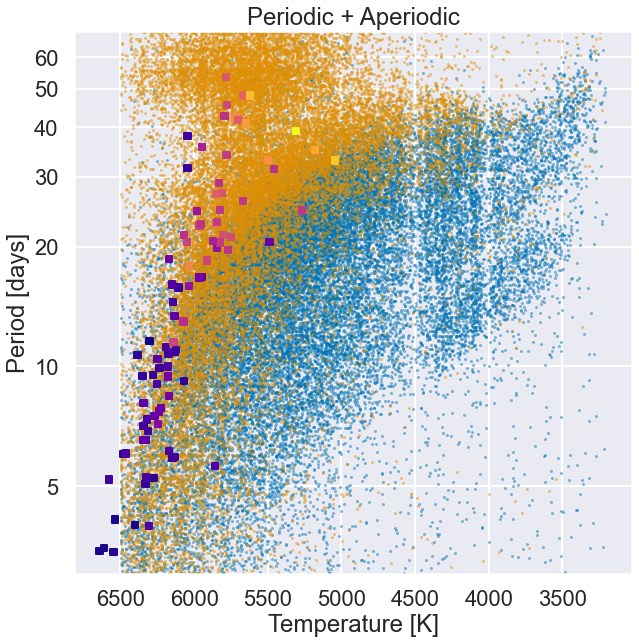

In [8]:
fig, ax = plt.subplots(1, figsize=(10,10))

ax.set_ylabel('Period [days]')
ax.set_xlabel('Temperature [K]')
ax.set_yscale('log')
ax.invert_xaxis()
ax.set_ylim(3, periodic.Prot.max())
ax.set_yticks([5, 10, 20, 30, 40, 50, 60])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_title('Periodic + Aperiodic')

ax.scatter(periodic.Teff, periodic.Prot, s=1, cmap='Blues_r', alpha=.5)
ax.scatter(aperiodic.Teff, aperiodic.Prot, s=1, cmap='Blues_r', alpha=.5)
c = ax.scatter(ati.Teff, ati.P, c=ati.age, cmap='plasma', marker=',', s=40)


fig.colorbar(c, ax=axes, label='Seismic Age', aspect=50, pad=-0.0001)
plt.savefig('ruth_ages_combi.png')